# **Linear regression from scratch**

Okapova Akerke

15BD02047

okapova.akerke@gmail.com

http://github.com/akerukesha

Example of Linear regression implemented from Scratch

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [36]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [37]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [38]:
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
data['MEDV'] = boston_data.target

In [40]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [42]:
# data = (data - data.mean())/data.std()
# data.head()

In [43]:
def plot_features(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(data[col],data["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

13


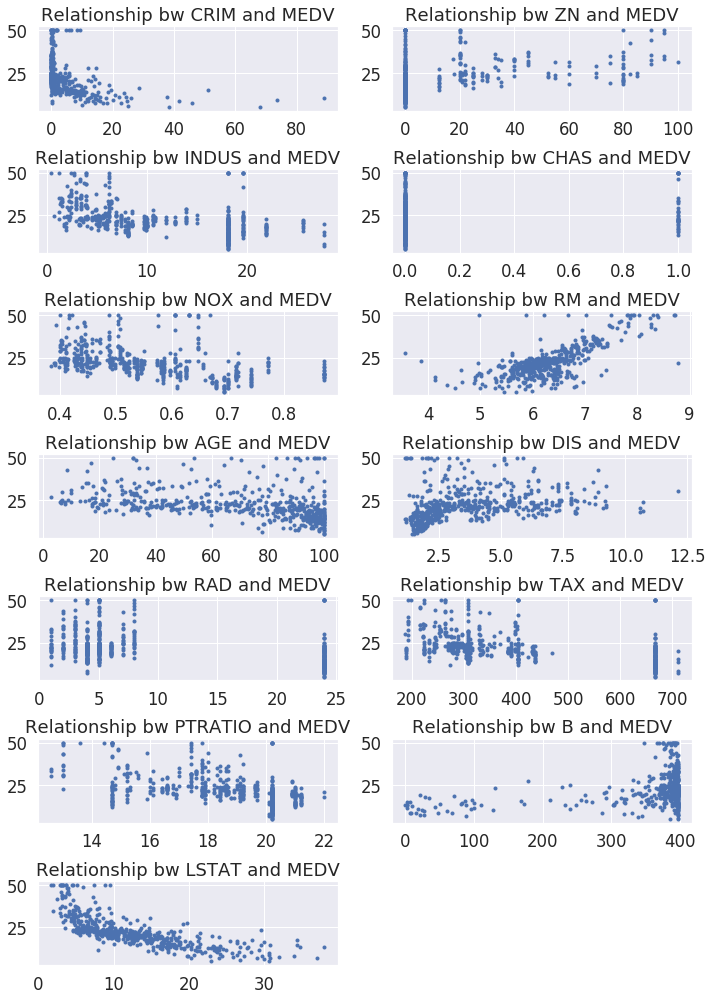

In [44]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plot_features(colnames,"Relationship bw %s and MEDV")

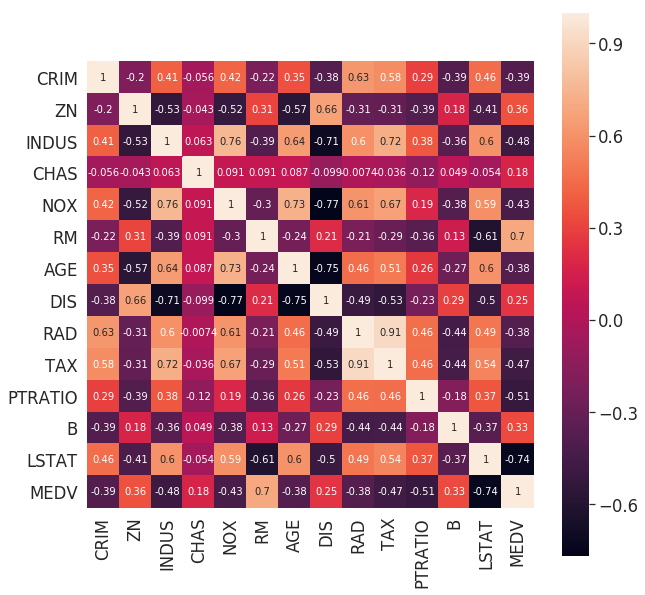

In [45]:
def plot_correlation():
    fig = plt.subplots(figsize = (10,10))
    sns.set(font_scale=1.5)
    sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
    plt.show()
plot_correlation()

In [46]:
def predict_price(x,theta):
    return np.dot(x,theta)

def calculate_cost(x,theta,Y):
    prediction = predict_price(x,theta)
    return ((prediction - Y)**2).mean()/2

In [50]:
def plot_linear_regression(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predict_price(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

In [51]:
def gradient_descent_linear_regression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = data["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = data["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predict_price(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculate_cost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            plot_linear_regression(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 258.03108385859133,theta = [1.0590419  6.86646571]


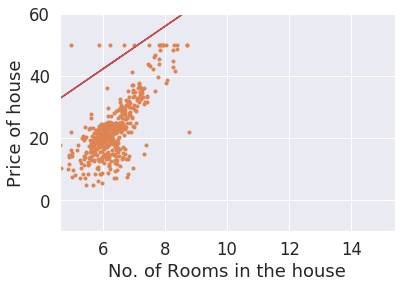

Iteration: 1001,Cost = 24.266176819465993,theta = [-14.66352286   5.95689176]


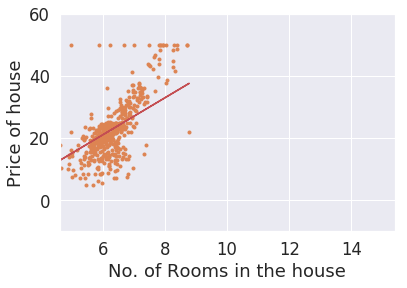

Iteration: 2001,Cost = 22.596414573659306,theta = [-23.30244842   7.31497465]


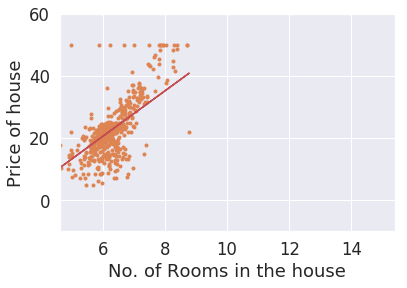

Iteration: 3001,Cost = 22.057316548467934,theta = [-28.21114608   8.08664681]


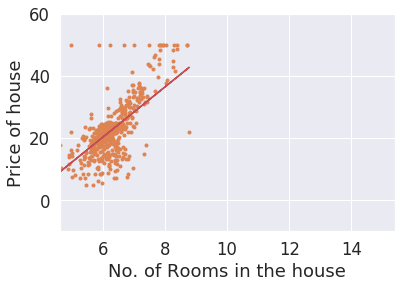

Iteration: 4001,Cost = 21.88326381641277,theta = [-31.00030227   8.52511631]


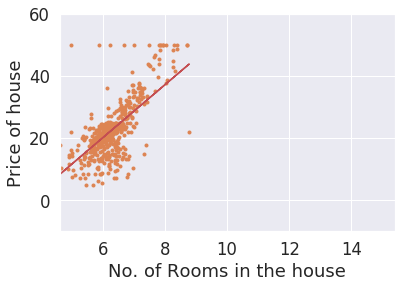

theta0 = 5000
theta1 = 5000
Costs = 5000


In [52]:
gradient_descent_linear_regression()